<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/Assignment_10_Reccomendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [34]:
#importing data
books = pd.read_csv('/content/book (2).csv',encoding="latin-1")
books.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [35]:
#Renaming the columns name
books.rename({'Unnamed: 0':'index','User.ID':'User_ID','Book.Title':'Book_Title','Book.Rating':'Book_Rating'},
              axis= 1, inplace= True)
books.set_index('index', inplace= True)
books.head()

,User_ID,Book_Title,Book_Rating
index,,,
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


EDA

In [36]:
books.shape

(10000, 3)

In [37]:
books.isnull().sum()

User_ID        0
Book_Title     0
Book_Rating    0
dtype: int64

In [38]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      10000 non-null  int64 
 1   Book_Title   10000 non-null  object
 2   Book_Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [39]:
books['Book_Rating'].describe()

count    10000.00000
mean         7.56630
std          1.82152
min          1.00000
25%          7.00000
50%          8.00000
75%          9.00000
max         10.00000
Name: Book_Rating, dtype: float64

In [40]:
#Let's create a ratings dataframe with average rating and number of ratings
books.groupby('Book_Title')['Book_Rating'].mean().sort_values(ascending=False).head()

Book_Title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
Name: Book_Rating, dtype: float64

In [41]:
books.groupby('Book_Title')['Book_Rating'].count().sort_values(ascending=False).head()

Book_Title
Fahrenheit 451                                   5
Ender's Game (Ender Wiggins Saga (Paperback))    4
Stardust                                         4
Vanished                                         4
Charlie and the Chocolate Factory                4
Name: Book_Rating, dtype: int64

In [42]:
ratings = pd.DataFrame(books.groupby('Book_Title')['Book_Rating'].mean())
ratings.head()

,Book_Rating
Book_Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [43]:
#Now set the number of ratings column
ratings['ratings_count'] = pd.DataFrame(books.groupby('Book_Title')['Book_Rating'].count())
ratings.head()

,Book_Rating,ratings_count
Book_Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


Data Visualization

<Axes: >

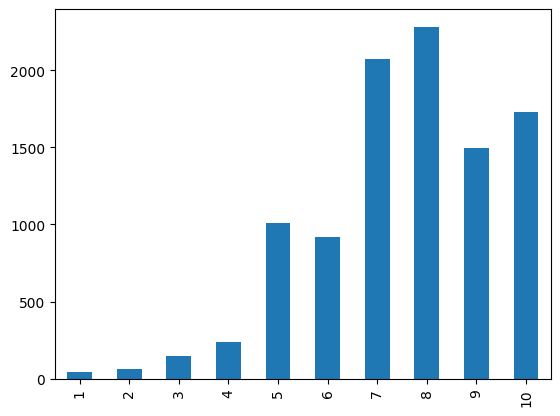

In [45]:
# Plotting the rating in the barplot
books['Book_Rating'].value_counts().sort_index().plot(kind='bar')

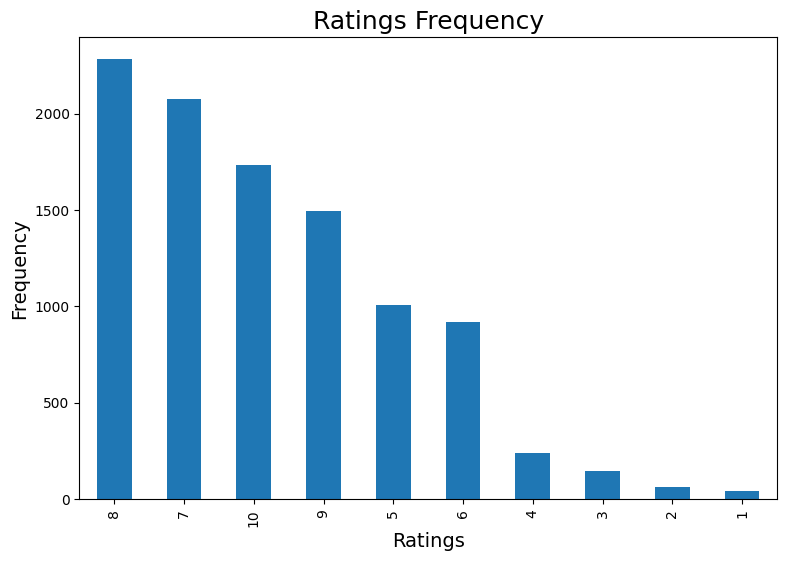

In [46]:
plt.figure(figsize=(9,6))
books['Book_Rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency', fontsize = 18)
plt.xlabel("Ratings", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14);

Observations:
Most Frequent Ratings by Users are: 8, 7 and 10

<Axes: >

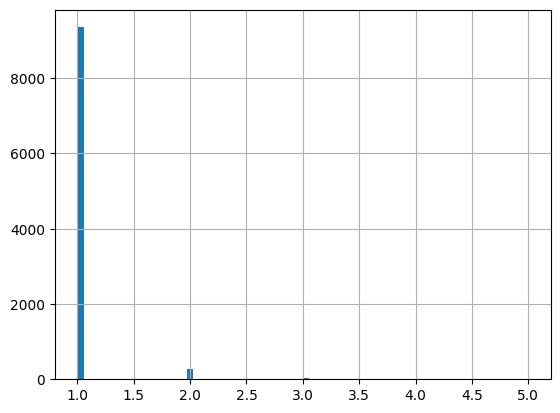

In [48]:
#Now a few histograms to have a general idea of what the data looks like
ratings['ratings_count'].hist(bins=70)

Observation:
Maximum Number of Books are Rated only Once

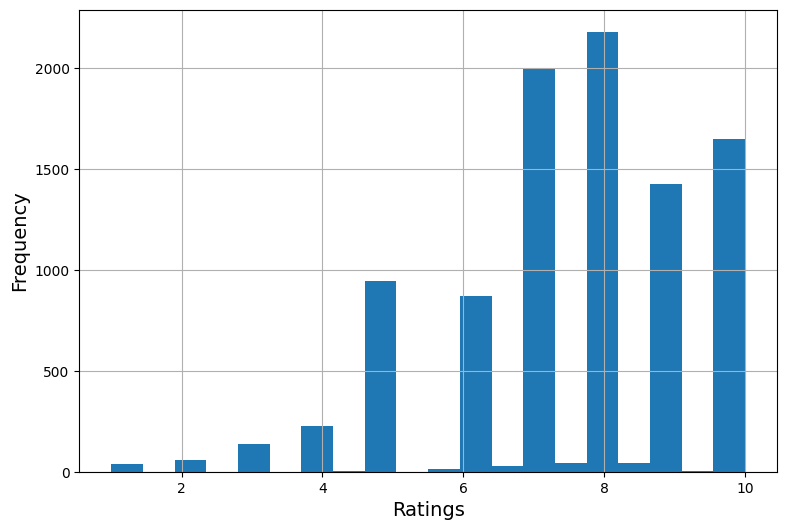

In [49]:
plt.figure(figsize=(9,6))
ratings['Book_Rating'].hist(bins=20)
plt.xlabel("Ratings", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14);

In [50]:
top_books = books['Book_Title'].value_counts().head(10)
top_books.index

Index(['Fahrenheit 451', 'Charlie and the Chocolate Factory',
       'The Subtle Knife (His Dark Materials, Book 2)', 'Vanished',
       'Ender's Game (Ender Wiggins Saga (Paperback))', 'Stardust',
       'The Amber Spyglass (His Dark Materials, Book 3)', 'Life Is Elsewhere',
       'The Golden Compass (His Dark Materials, Book 1)',
       'The Hitchhiker's Guide to the Galaxy'],
      dtype='object')

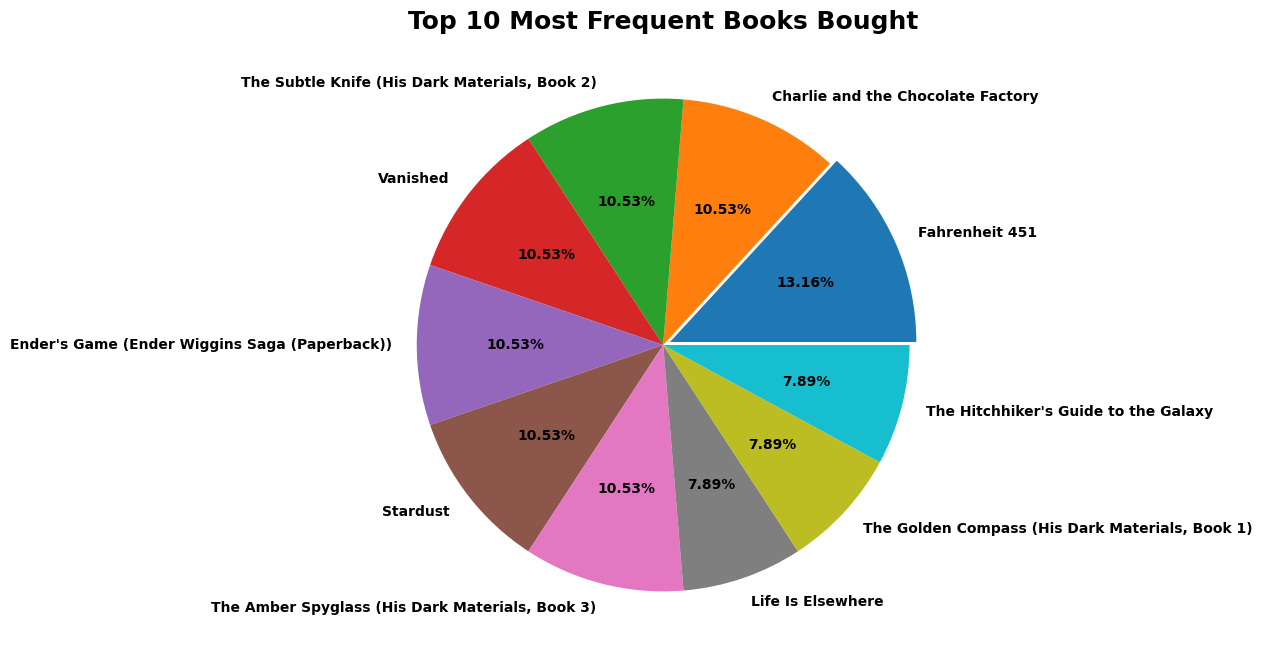

In [51]:
plt.figure(figsize = (8,8))
plt.pie(top_books, labels=top_books.index,
        explode = [0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%', textprops = {'size' : 10, 'fontweight': 'bold'})

plt.title("Top 10 Most Frequent Books Bought", fontsize = 18, fontweight = 'bold');

Collaborative Book Recommendation System

In [53]:
bookmat = books.pivot_table(index='User_ID',columns='Book_Title',values='Book_Rating').fillna(0)
bookmat

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [54]:
# Calculating Cosine Similarity between Users on array data
user_sim=1-pairwise_distances(bookmat.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [55]:
#Store the results in a dataframe
user_sim2 = pd.DataFrame(user_sim)
user_sim2

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
# Set the index and column names to UserId
user_sim2.index=books['User_ID'].unique()
user_sim2.columns=books['User_ID'].unique()
user_sim2

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
# Nullifying diagonal values
np.fill_diagonal(user_sim,0)
user_sim2

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# Most Similar Users
user_sim2.idxmax(axis=1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [62]:
# extract the books which userId 276813 have watched
id1=books[books['User_ID']==276813]
id1

,User_ID,Book_Title,Book_Rating
index,,,
45,276813,Icebound,8
46,276813,I'll Be Seeing You,8
47,276813,From the Corner of His Eye,6
48,276813,Isle of Dogs,8
49,276813,Purity in Death,6
50,276813,This Year It Will Be Different: And Other Stories,6
51,276813,Proxies,8


In [63]:
# extract the books which userId 8 have watched
id2=books[books['User_ID']==8]
id2

,User_ID,Book_Title,Book_Rating
index,,,
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5
2403,8,Truckers,5
2404,8,Keepers of the Earth Teachers Guide,6
2405,8,The Celts Activity Book,6
2406,8,The Art Of Celtia,7


In [65]:
# extract the books which userId 276813 & 8 have watched
books[(books['User_ID']==276813) | (books['User_ID']==8)]

,User_ID,Book_Title,Book_Rating
index,,,
45,276813,Icebound,8
46,276813,I'll Be Seeing You,8
47,276813,From the Corner of His Eye,6
48,276813,Isle of Dogs,8
49,276813,Purity in Death,6
50,276813,This Year It Will Be Different: And Other Stories,6
51,276813,Proxies,8
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5


In [66]:
# Extract the books which userId 162113 & 276736 have watched
books[(books['User_ID']==162113) | (books['User_ID']==276736)]

,User_ID,Book_Title,Book_Rating
index,,,
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
9990,162113,The Cape Ann (Contemporary American Fiction),8


In [67]:
# Extract the books which userId 162113 & 162115 have watched
books[(books['User_ID']==162113) | (books['User_ID']==162115)]

,User_ID,Book_Title,Book_Rating
index,,,
9990,162113,The Cape Ann (Contemporary American Fiction),8


Recommendation Based on Cosine Similarity

In [68]:
def get_recommendation(customer_id):
        
        tem=list(user_sim2.sort_values([customer_id],ascending=False).head(3).index)

        book_list=list(books[books['User_ID'].isin(tem)]['Book_Title'])

        recommended_books = set(book_list)-set(books[books['User_ID']==customer_id]['Book_Title'])
        
        return recommended_books

In [69]:
get_recommendation(162113)

{'Bread, Tomato, Garlic: Quick Cooking With 3 Main Ingredients',
 'Cinnamon (Shooting Stars)',
 'Classical Mythology',
 'Home Song',
 'Spring Fancy',
 'Surrender',
 'Surrender to Love (Avon Historical Romance)',
 "The Ubiquitous Shrimp: From Simple to Exotic, from Feasts to Snacks, All the Wonderful Ways to Savor America's Favorite Seafood"}

In [70]:
get_recommendation(276813)

{'A Man of Steel',
 'Dance the Eagle to Sleep',
 'The Apprentice',
 'The Seventh Night'}

In [72]:
get_recommendation(8)

{'A Man of Steel',
 'Classical Mythology',
 'The Apprentice',
 'The Seventh Night'}